# Assignment 1 - k-Armed Bandit Problem (Stationary)
## Special Topics: Reinforcement Learning KV
### WS 2020

---
<div class="alert alert-warning">

**Due:** 03.11.2020, 13:45
</div>

---
<br>
<center><img src="https://conversionxl.com/wp-content/uploads/2015/09/multiarmedbandit.jpg">
<br>
</center>

<div class="alert alert-info">
In our first assignment, you will implement and analyze the different strategies (algorithms) to solve the k-Armed Bandit Problem presented in the lecture. The maximum number of points for each subtask is indicated next to the sections.

To successfully complete this exercise, read the notebook carefully from beginning to end and fill out the coding parts marked with **TODO**.
</div>

---

# Definition of the Problem
Problem Description:
- We repeatly choose among $k$ different actions (options)
- After each action you receive a numeric reward
  (originating from a stationary probability distribution)
- Our objective: maximize expected total reward over time by concentrating on beneficial actions

The particular problem we are facing here is defined as follows:
- A set of 2000 randomly generated $10$-armed bandit problems
- For each problem instance, the true action values $q_*(a)$ are sampled from $\mathcal{N}(0,\,1)$
- The actual rewards $R_t$ are sampled from $\mathcal{N}(q_*(a),\,1)$

## Python Imports

As you will probably notice below we also explicitly import the packages numpy and matplotlib to directly access their functionality.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# set some colors for plots
cmap = [
    'tab:blue', 'tab:orange', 'tab:green', 'tab:red',
    'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray',
    'tab:olive', 'tab:cyan'
]
# we set the number of choices to 10
N_ACTIONS = 10

# we also fix a seed for reproducing our results
np.random.seed(4711)

# interactive plotting "on"
plt.ion()

<div class="alert alert-info"> 

**Hints:**  These are some libraries and functions which will turn out to be very useful for this exercise:
<ul>
<li>numpy.random: <a href="https://numpy.org/doc/stable/reference/random/index.html"> documentation</a></li>
<li>numpy.random.random()</li>
<li>numpy.random.choice()</li>
<li>numpy.argmax()</li>
<li>numpy.sum()</li>
<li>numpy.zeros()</li>
<li>numpy.arange</li>
</ul>
</div>

## Definition of k-Armed Bandit Problem
In this section we implement the actual bandit problem.

In [26]:
class kArmedBandit(object):
    """
    Specifies a k-armed bandit problem
    
    The agent has to choose from k different actions.
    Taking an action yields a numeric reward specified by a stationary probability distribution.
    """
    
    def __init__(self, k=10):
        """ Constructor """
        
        # sample action values from gaussian with mean 0 and standard deviation 1
        self.q_star = np.zeros(k)
        for a in range(k):
            self.q_star[a] = np.random.randn()
    
    def step(self, action):
        """
        Take one step following the given action.
        
        Parameters
        ----------
           @action: action id (integer in [0, k[)
        
        Returns
        -------
            the reward for taking this action.
        """
        Ri = self.q_star[action] + np.random.randn()
        return Ri
        

## Visualization of one problem instance
This section is <b>just for visualizing</b> the problem instances we are facing.
For this purpose we generate one instance of the problem and uniformly select actions to get a notion of the underlying stationary probability distribution.

<div class="alert alert-info">
    **Hint:** If you would like to visualize the problem instance with the <b>nice</b> violin plots as in the lecture slides check out the python package <b>seaborn</b> (http://seaborn.pydata.org/examples/).
    This is of course <b>not mandatory</b>. It's just good to know that this package exists.
</div>

Matplotlib's native violinplots are not as nice, but do the job. 

In [27]:
# initialize bandit problem with N_ACTIONS actions
bandit_instance = kArmedBandit(k=N_ACTIONS)

In [28]:
# iterate actions and select each one 1000 times
N_SAMPLES = 1000
action_rewards = np.zeros((N_SAMPLES, N_ACTIONS))
for action in range(N_ACTIONS):
    # choose each action several times and recive reward
    # (this will hopefully reveal the underlying distribution)
    for i_sample in range(N_SAMPLES):
        reward = bandit_instance.step(action)
        action_rewards[i_sample, action] = reward
    

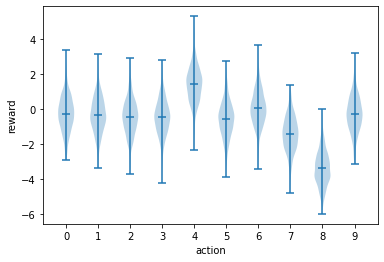

In [29]:
# the array needs to be transposed, as the violinplot function
# expects samples along the first dimension
plt.violinplot(
    action_rewards,
    np.arange(0, N_ACTIONS),
    showmeans=True,
    showmedians=False,
    showextrema=True
)
plt.xlabel('action')
plt.xticks(np.arange(0, N_ACTIONS))
plt.ylabel('reward')
plt.show()

# Comparison of Standard Algorithms
Your task in this exercise is to compare the bandit algorithms listed below on our standard testbed e.g. the 10-armed bandit problem.
* Iterative Sample Average Method
* Greedy vs. epsilon-Greedy Action Selection
* Optimistic Initial Values
* Gradient Bandit Algorithms

## Random Action Selection Baseline
Implementation of a random action selection baseline. This should just serve as a template for you to implement the much more intelligent bandit algorithms below.

In [30]:
class RandomBaseline(object):
    """
    Random Action Selection
    
    Parameters
    ----------
        @k: number of possible actions (integer)
    """
    
    def __init__(self, k=10):
        """ Constructor """
        
        # number of possible actions
        self.k = k
    
    def choose_action(self):
        """ Action selection """
        
        # choose random action
        At = np.random.choice(self.k)
        return At
    
    def update_estimates(self, action, reward):
        """ update action value estimate """
        # nothing todo here
        pass

## (1.1) Incremental Sample Average Method (5 points)
Implementation of the Sample Average Method. The algorithm is parametrized by the number of actions and a probability $\epsilon$ of picking a random action instead of following the policy.

In [31]:
class IncrementalSampleAverageMethod(object):
    """
    Incremental Implemenation of Sample Average Method
    
    Parameters
    ----------
        @k: number of possible actions (integer)
        @epsilon: probability for selecting a random action (float in [0, 1])
    """
    
    def __init__(self, k=10, epsilon=0.0):
        """ Constructor """
        # TODO
        self.k = k
        self.K = np.zeros(k)
        self.epsilon = epsilon
        self.est_values = np.zeros(k)
        self.arm_values = np.random.normal(0,1,k)

        
    def choose_action(self):
        """ Action selection """
        # TODO
        rand_num = np.random.random()
        if self.epsilon>rand_num:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.est_values)
    
    def update_estimates(self, action, reward):
        """ update action value estimate """
        # TODO
        self.K[action] += 1
        alpha = 1./self.K[action]
        self.est_values[action] += alpha * (reward - self.est_values[action])

## (1.2) Optimistic Initial Values (2 points)
Change the Implementation of the Sample Average Method from above to use Optimistic Initial Values for exploration. The algorithm is parametrized by the number of actions and a set of initial values initialize the value estimates.
The latter is required for Optimistic Initial Values which allows to encourage exploration.

<div class="alert alert-info"> 

**Hint:** You can of course also include this initialization scheme as an additional parameter in the implementation of the Incremental Sample Average Method above.
</div>

In [32]:
class OptimisticInitialValues(object):
    """
    Incremental Implemenation of Optimisitc Initial Values
    
    Parameters
    ----------
        @k: number of possible actions (integer)
        @initial_value: initial action value estimate
    """
    
    def __init__(self, k=10, initial_value=0.0):
        """ Constructor """
        # TODO
        self.K = np.zeros(k)
        self.k = k
        self.est_values = np.zeros(k)+initial_value
        self.arm_values = np.random.normal(0,1,k)

    def choose_action(self):
        """ Action selection """
        # TODO
        return np.argmax(self.est_values)
    
    def update_estimates(self, action, reward):
        """ update action value estimate """
        # TODO
        self.K[action] += 1
        alpha = 1./self.K[action]
        self.est_values[action] += alpha * (reward - self.est_values[action])

## (1.3) Upper Confidence Bound Action Selection (3 points)
Implementation of the Upper Confidence Bound Action Selection. The algorithm is parametrized by the number of actions and a value $c > 0$ to control the degree of exploration.

<div class="alert alert-info"> 

**Hint:** In case you encounter a division by 0 error, take a closer look on your values for $t$ and $N_t(a)$.
Note that if $N_t(a) = 0$, then $a$ is considererd to be a maximizing action.
</div>

In [33]:
class UCB(object):
    """
    Incremental Implemenation of Upper Confidence Bound Action Selection
    
    Parameters
    ----------
        @k: number of possible actions (integer)
        @c: degree of exploration
    """
    
    def __init__(self, k=10, c=1.):
        """ Constructor """
        # TODO
        self.k = k
        self.N = np.ones(k)
        self.c = c
        self.Q = np.zeros(k)
        self.t = 1
        
        
    def choose_action(self):
        """ Action selection """
        # TODO
        if self.t ==0:
          a = np.random.choice(self.k)
        ac = self.Q + self.c*np.sqrt(np.log(self.t)/self.N)
        a = np.argmax(ac)
        return a

    
    def update_estimates(self, action, reward):
        """ update action value estimate """
        # TODO
        self.N[action] +=1
        self.t +=1
        alpha = 1./self.N[action]
        self.Q[action] += alpha *(reward-self.Q[action]) 


## (1.4) Gradient Bandit Algorithm (5 points)
Implementation of the Gradient Bandit Algorithm. The algorithm is parametrized by the number of actions and step size $\alpha$.

In [34]:
class GradientBandit(object):
    """
    Gradient Bandit Method
    
    Parameters
    ----------
        @k: number of possible actions (integer)
        @alpha: step-size parameter (float)
    """
    
    def __init__(self, k=10, alpha=0.1):
        """ Constructor """
        # TODO
        self.k = k
        self.actions = np.arange(k)
        self.H = np.zeros(k)
        self.alpha = alpha
        self.rewards = [ ]
        

    
    def choose_action(self):
        """ Action selection """
        self.prob_action = np.exp(self.H - np.max(self.H)) \
            / np.sum(np.exp(self.H - np.max(self.H)), axis=0)
        action = np.random.choice(self.k,p=self.prob_action)
        return action
    
    def update_estimates(self, action, reward):
        """ update action selection preferences """
        # TODO
        self.rewards.append(reward)
        avg_r = np.average(self.rewards)
        # Update preferences
        self.H[action] += self.alpha * (reward - avg_r)*(1-self.prob_action[action])
        actions_not_taken = self.actions!=action
        self.H[actions_not_taken]-= self.alpha * (reward - avg_r)* self.prob_action[actions_not_taken]


## Experiments
In the following we will actually test our implementations on a set of real bandit problems.
For comparing the methods we will create similar *time step vs. reward plots* as the ones shown in the lecture slides.

<div class="alert alert-info"> 

**Hints:** If you have not worked with **matplotlib** yet then this is a list of useful functions for you:
<ul>
<li>matplotlib.pyplot.figure()</li>
<li>matplotlib.pyplot.subplot()</li>
<li>matplotlib.pyplot.plot()</li>
<li>matplotlib.pyplot.legend()</li>
<li>matplotlib.pyplot.ylabel()</li>
<li>matplotlib.pyplot.xlabel()</li>
<li>matplotlib.pyplot.title()</li>
<li>matplotlib.pyplot.show()</li>
</ul>

<br>
And here you can find the documentation: https://matplotlib.org/api/pyplot_api.html
</div>

### Experimental setup: run n_runs different instances of the k-armed bandit problem for n_steps steps.
Convenience function for carrying out the experiments.

In [35]:
def run_experiments(n_runs=1000, n_steps=1000, method=RandomBaseline, **kwargs):
    """
    Run experiments following the policy of the provided agent
    
    @n_runs: number of different bandit problems (integer)
    @n_steps: number of steps taken in each individual problem (integer)
    @method: one of the bandit algorithms from above
    @**kwargs: arguments of given method
    
    Some Examples:
    run_experiments(n_runs=1000, n_steps=1000, method=RandomBaseline)
    run_experiments(method=IncrementalSampleAverageMethod, epsilon=0.0)
    run_experiments(n_runs=100, n_steps=1000, method=IncrementalSampleAverageMethod, epsilon=0.0)
    
    returns an array of rewards with shape (n_runs, n_steps)
    where element (i,j) contains the reward of step j in ith run.
    """
    args_list = ['{}={}'.format(k, v) for k, v in sorted(kwargs.items())]
    args_string = ','.join(args_list)
    print("running {}({})".format(method.__name__, args_string))
    
    # initialize results
    rewards = np.zeros((n_runs, n_steps))

    # perform multiple runs
    for run in range(n_runs):
        
        # initialize agent
        agent = method(k=N_ACTIONS, **kwargs)
        
        # get new instance of problem
        bandit_instance = kArmedBandit(k=N_ACTIONS)
        
        # get best action value for current instance
        best_action_value = bandit_instance.q_star[np.argmax(bandit_instance.q_star)]

        # perform multiple steps on problem instance
        for step in range(n_steps):

            # pick action
            action = agent.choose_action()

            # take action and receive reward
            reward = bandit_instance.step(action)
            
            # compute percentage with respect to best action
            perc_of_opt = 100.0 * reward / best_action_value

            # update agent
            agent.update_estimates(action, reward)

            
            # book keeping
            rewards[run, step] = reward
    
    print("done!")
    return rewards

### Random Action Selection
Lets see how well our random action selection baseline performs.

In [36]:
# run experiments
rewards_random = run_experiments(method=RandomBaseline)

running RandomBaseline()
done!


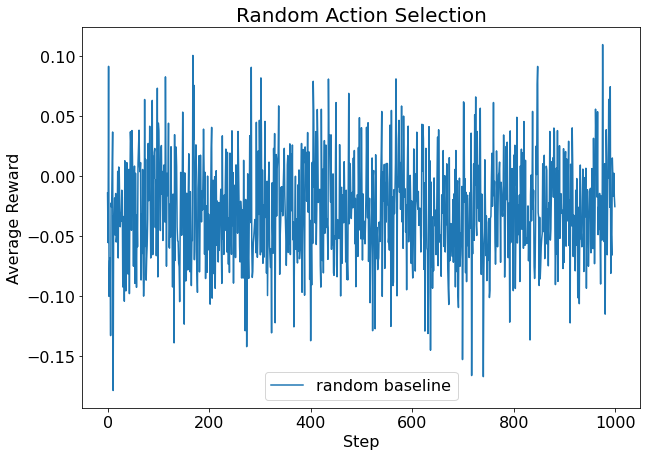

In [37]:
# visualize results
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
plt.plot(
    rewards_random.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[0],                # choose a color
    label='random baseline'       # choose a name
)
plt.legend(loc='best', fontsize=16)
plt.ylabel("Average Reward", fontsize=16)
plt.xlabel("Step", fontsize=16)
plt.title("Random Action Selection", fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

## (1.5) Greedy vs. $\epsilon$-Greedy (4 points)
In our first experiment we will explore the influence of the random action selection probability $\epsilon$ on the evolution of the reward we get.

For this purpose
- First run the *IncrementalSampleAverageMethod* three times with $\epsilon \in \{0.0, 0.01, 0.1\}$
- and compare their performance in one plot.
- Briefly describe your observations.
- Which method will perform best in the long run in terms of cumulative reward and cumulative probability of selecting the best action? How much better will it be? Express your answer quantitatively.

In [38]:
# run experiments
rewards_greedy0 = run_experiments(method=IncrementalSampleAverageMethod,epsilon=0.0)
rewards_greedy1 = run_experiments(method=IncrementalSampleAverageMethod,epsilon=0.01)
rewards_greedy2 = run_experiments(method=IncrementalSampleAverageMethod,epsilon=0.1)

running IncrementalSampleAverageMethod(epsilon=0.0)
done!
running IncrementalSampleAverageMethod(epsilon=0.01)
done!
running IncrementalSampleAverageMethod(epsilon=0.1)
done!


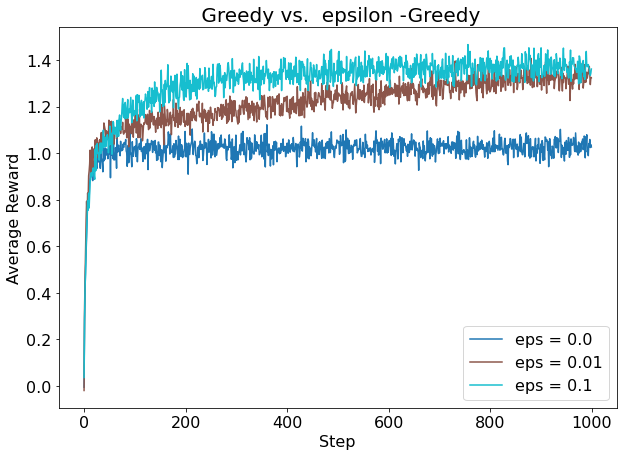

In [39]:
# visualize results
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
plt.plot(
    rewards_greedy0.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[0],                # choose a color
    label='eps = 0.0'       # choose a name
)
plt.plot(
    rewards_greedy1.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[5],                # choose a color
    label='eps = 0.01'       # choose a name
)
plt.plot(
    rewards_greedy2.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[9],                # choose a color
    label='eps = 0.1'       # choose a name
)
plt.legend(loc='best', fontsize=16)
plt.ylabel("Average Reward", fontsize=16)
plt.xlabel("Step", fontsize=16)
plt.title(" Greedy vs.  epsilon -Greedy", fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

- Briefly describe your observations.

It can be observed that as the epsilion value increases the Average Reward increases too,however we can see that eps=0.1 nearly converging with eps=0.01.

- Which method will perform best in the long run in terms of cumulative reward and cumulative probability of selecting the best action? How much better will it be? Express your answer quantitatively.

Looking at the graph and the book it can be hypothesized that the method with the highet epsilon value will achieve the highest cumulative reward and choose the best acion. So the epsilion greedy is better. More specifically the method with a eps=0.01 will perform better in the long run as we assume the data stationary so it will be able to exploit about 99% of the time.

Quanitatively we can say the following:

Let’s say that the average Q value is $\bar{q_s}:$


*   eps = 0.01 will have an average award of  f $0.01 * \bar{q_s} + 0.99 * q_{opt}$
*   eps = 0.1 will have an average award of  f $0.01 * \bar{q_s} + 0.9 * q_{opt}$

Thus depending on the gap between $\bar{q}_s and q_{opt}$ the performance of the algorith will change drastically.





## (1.6) Greedy vs. Optimistic Initial Values (2 points)
In our second experiment we evaluate the performance of another approach to enforce exploration, namely Optimistic Initial Values.

For this purpose
- Run *OptimisticInitialValues* with an initial value of 5.0 for all actions.
- and compare its performance with the *IncrementalSampleAverageMethod* and $\epsilon=0.0$.
- Briefly describe and explain your observations.

In [40]:
# run experiments
rewards_optom = run_experiments(method=OptimisticInitialValues,initial_value=5.0)

running OptimisticInitialValues(initial_value=5.0)
done!


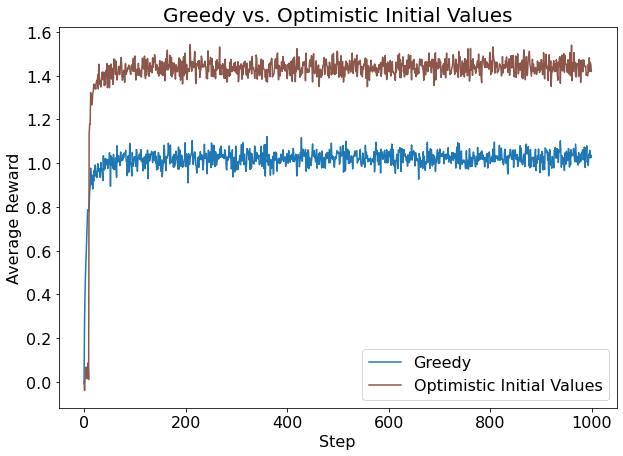

In [41]:
# visualize results
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
plt.plot(
    rewards_greedy0.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[0],                # choose a color
    label='Greedy'       # choose a name
)
plt.plot(
    rewards_optom.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[5],                # choose a color
    label='Optimistic Initial Values'       # choose a name
)
plt.legend(loc='best', fontsize=16)
plt.ylabel("Average Reward", fontsize=16)
plt.xlabel("Step", fontsize=16)
plt.title("Greedy vs. Optimistic Initial Values", fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

- Briefly describe and explain your observations.

We can observerve that by applying a Optimistic Initial Values, that the average reward is much larger than compared to the average reward from the greedy algorithm.

## (1.7) $\epsilon$-Greedy vs Upper Confidence Bound Action Selection (2 points)
In our next experiment we compare $\epsilon$-greedy action selection with the *UCB* action selection algorithm.

For this purpose
- Run the *UCB* action selection algorithm with exploration parameter $c=2$
- and compare its performance with the *IncrementalSampleAverageMethod* and $\epsilon=0.1$.
- Briefly describe and explain your observations.

In [42]:
# run experiments
rewards_ucb = run_experiments(method=UCB,c=2.0)

running UCB(c=2.0)
done!


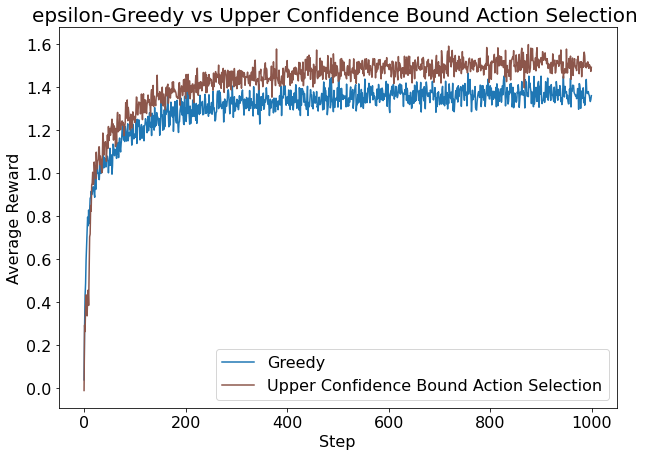

In [43]:
# visualize results
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
plt.plot(
    rewards_greedy2.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[0],                # choose a color
    label='Greedy'       # choose a name
)
plt.plot(
    rewards_ucb.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[5],                # choose a color
    label='Upper Confidence Bound Action Selection'       # choose a name
)
plt.legend(loc='best', fontsize=16)
plt.ylabel("Average Reward", fontsize=16)
plt.xlabel("Step", fontsize=16)
plt.title("epsilon-Greedy vs Upper Confidence Bound Action Selection ", fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

It can be observed that the Upper Confidence Bound Selection is slightly better and thus achives a higher average reward on later steps.

## (1.8) $\epsilon$-Greedy vs Gradient Bandit (2 points)
In our last experiment we compare $\epsilon$-greedy action selection with the *GradientBandit* algorithm.

For this purpose
- Run the *GradientBandit* algorithm with step sizes $\alpha=0.01$ and $0.1$.
- and compare its performance with the *IncrementalSampleAverageMethod* and $\epsilon=0.1$.
- Briefly describe and explain your observations.

In [44]:
# run experiments
rewards_gbandit0 = run_experiments(method=GradientBandit,alpha=0.01)
rewards_gbandit1 = run_experiments(method=GradientBandit,alpha=0.1)

running GradientBandit(alpha=0.01)
done!
running GradientBandit(alpha=0.1)
done!


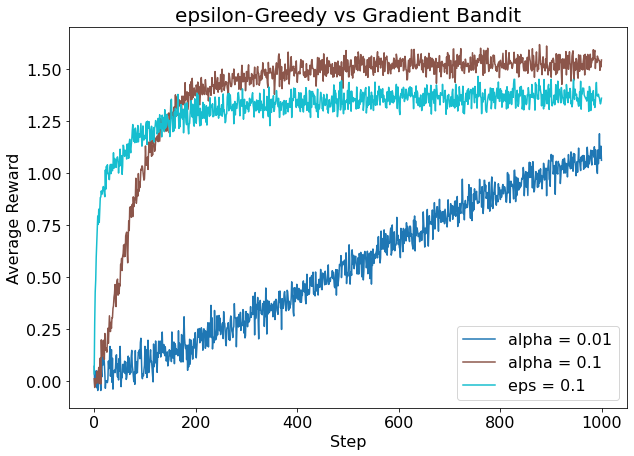

In [45]:
# visualize results
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
plt.plot(
    rewards_gbandit0.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[0],                # choose a color
    label='alpha = 0.01'       # choose a name
)
plt.plot(
    rewards_gbandit1.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[5],                # choose a color
    label='alpha = 0.1'       # choose a name
)
plt.plot(
    rewards_greedy2.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[9],                # choose a color
    label='eps = 0.1'       # choose a name
)
plt.legend(loc='best', fontsize=16)
plt.ylabel("Average Reward", fontsize=16)
plt.xlabel("Step", fontsize=16)
plt.title("epsilon-Greedy vs Gradient Bandit", fontsize=20)
ax.tick_params(labelsize=16)
plt.show()

As already discussed in the lecture, when we compare the GradientBandit algorithm to the Greedy we can see that with a alpha = 0.01 epsilon Greedy performs better however it could be argued that more steps would probably show the Gradient Bandit algorithm would get a higher average reward. We can see that when we do increase the alpha we do get a higher average reward overall.

# (1.9) Bonus Exercise (Exercise 2.3 in the book, 5 bonus points)
Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for <b>non-stationary</b> problems. Use a modified version of the 10-armed testbed in which all the $q^∗(a)$ start out equal and then take independent random walks.


Prepare plots like Figure 2.2 in the book for:

- an action-value method using sample averages, incrementally computed by $\alpha=\frac{1}{n}$

- another action-value method using a constant step-size parameter, $\alpha=0.1$.


Use $\epsilon=0.1$ and, if necessary, runs longer than 1000 steps. (exercise taken from book)

In [46]:
# TODO
class kArmedBandit(object):
    """
    Specifies a k-armed bandit problem
    
    The agent has to choose from k different actions.
    Taking an action yields a numeric reward specified by a stationary probability distribution.
    """
    
    def __init__(self, k=10):
        """ Constructor """
        
        # sample action values from gaussian with mean 0 and standard deviation 1
        self.q_star = np.zeros(k)
        for a in range(k):
            self.q_star[a] = np.random.randn()
    
    def step(self, action):
        """
        Take one step following the given action.
        
        Parameters
        ----------
           @action: action id (integer in [0, k[)
        
        Returns
        -------
            the reward for taking this action.
        """
        self.q_star+=np.random.randn()/10
        Ri = self.q_star[action] + np.random.randn()
        return Ri

In [47]:
bandit_instance = kArmedBandit(k=N_ACTIONS)

In [48]:
# iterate actions and select each one 1000 times
N_SAMPLES = 3000
action_rewards = np.zeros((N_SAMPLES, N_ACTIONS))
for action in range(N_ACTIONS):
    # choose each action several times and recive reward
    # (this will hopefully reveal the underlying distribution)
    for i_sample in range(N_SAMPLES):
        reward = bandit_instance.step(action)
        action_rewards[i_sample, action] = reward

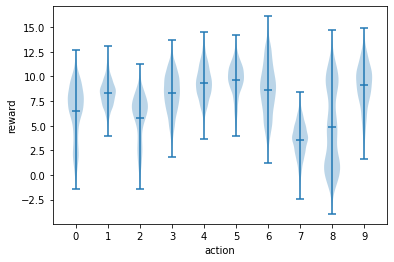

In [49]:
# the array needs to be transposed, as the violinplot function
# expects samples along the first dimension
plt.violinplot(
    action_rewards,
    np.arange(0, N_ACTIONS),
    showmeans=True,
    showmedians=False,
    showextrema=True
)
plt.xlabel('action')
plt.xticks(np.arange(0, N_ACTIONS))
plt.ylabel('reward')
plt.show()

In [50]:
class Bonus1(object):
    """
    Incremental Implemenation of Sample Average Method
    
    Parameters
    ----------
        @k: number of possible actions (integer)
        @epsilon: probability for selecting a random action (float in [0, 1])
    """
    
    def __init__(self, k=10, epsilon=0.0):
        """ Constructor """
        # TODO
        self.k = k
        self.K = np.zeros(k)
        self.epsilon = epsilon
        self.est_values = np.zeros(k)
        self.arm_values = np.random.normal(0,1,k)

        
    def choose_action(self):
        """ Action selection """
        # TODO
        rand_num = np.random.random()
        if self.epsilon>rand_num:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.est_values)
    
    def update_estimates(self, action, reward):
        """ update action value estimate """
        # TODO
        self.K[action] += 1
        alpha = 0.1
        self.est_values[action] += alpha * (reward - self.est_values[action])
        

In [51]:
class Bonus2(object):
    """
    Incremental Implemenation of Sample Average Method
    
    Parameters
    ----------
        @k: number of possible actions (integer)
        @epsilon: probability for selecting a random action (float in [0, 1])
    """
    
    def __init__(self, k=10, epsilon=0.0):
        """ Constructor """
        # TODO
        self.k = k
        self.K = np.zeros(k)
        self.epsilon = epsilon
        self.est_values = np.zeros(k)
        self.arm_values = np.random.normal(0,1,k)
        self.n = 0

        
    def choose_action(self):
        """ Action selection """
        # TODO
        rand_num = np.random.random()
        if self.epsilon>rand_num:
            return np.random.randint(self.k)
        else:
            return np.argmax(self.est_values)
    
    def update_estimates(self, action, reward):
        """ update action value estimate """
        # TODO
        self.n+=1
        self.K[action] += 1
        alpha = 1./self.n
        self.est_values[action] += alpha * (reward - self.est_values[action])

In [52]:
rewards_base = run_experiments(method=IncrementalSampleAverageMethod,epsilon=0.1)
rewards_bonus1 = run_experiments(method=Bonus1,epsilon=0.1)
rewards_bonus2 = run_experiments(method=Bonus2,epsilon=0.1)

running IncrementalSampleAverageMethod(epsilon=0.1)
done!
running Bonus1(epsilon=0.1)
done!
running Bonus2(epsilon=0.1)
done!


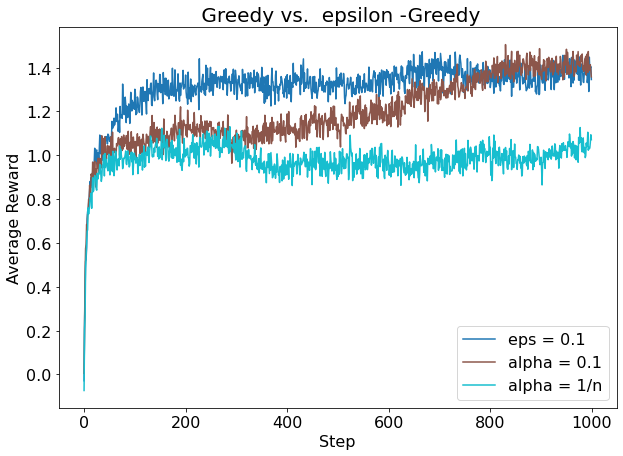

In [53]:
# visualize results
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
plt.plot(
    rewards_base.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[0],                # choose a color
    label='eps = 0.1'       # choose a name
)
plt.plot(
    rewards_bonus1.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[5],                # choose a color
    label='alpha = 0.1'       # choose a name
)
plt.plot(
    rewards_bonus2.mean(axis=0),  # average over all runs
    '-',  # this sets a glyph for points on the line
    color=cmap[9],                # choose a color
    label='alpha = 1/n'       # choose a name
)
plt.legend(loc='best', fontsize=16)
plt.ylabel("Average Reward", fontsize=16)
plt.xlabel("Step", fontsize=16)
plt.title(" Greedy vs.  epsilon -Greedy", fontsize=20)
ax.tick_params(labelsize=16)
plt.show()